1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
import pandas as pd
import numpy as np
import csv
import json
import urllib.request
import ssl
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns

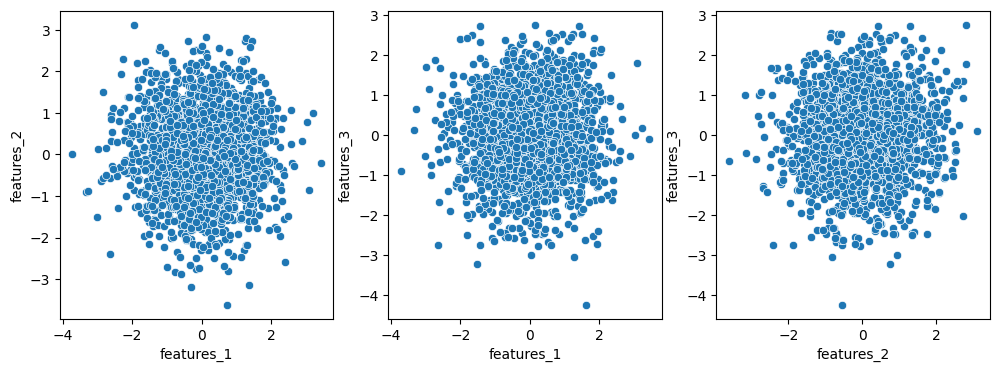

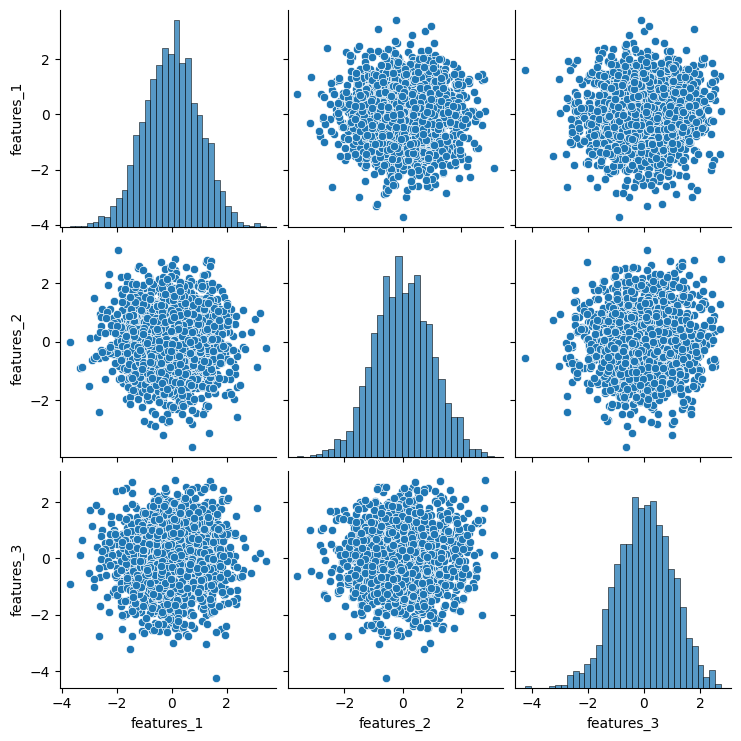

In [2]:
#url = 'https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv'
#data_file = urllib.request.urlopen(url)
#(usando urllib.request non funziona)

#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
fname = 'regression_generated.csv'
data = pd.read_csv(fname)

#with pyplot
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

#ax1.scatter(x = data['features_1'],y = data['features_2'], marker = 'o', c = 'r', edgecolor = 'b')
#ax1.set_title('Scatter: $Features 1$ vs $Features 2$')
#ax1.set_xlabel('$Features 1$')
#ax1.set_ylabel('$Features 2$')
#ax1.set_xlim(left = -5, right = 4)
#ax1.set_ylim(top = 4, bottom = -5)

#ax2.scatter(x = data['features_1'],y = data['features_3'], marker = 'o', c = 'g', edgecolor = 'r')
#ax2.set_title('Scatter: $Features 1$ vs $Features 3$')
#ax2.set_xlabel('$Features 1$')
#ax2.set_ylabel('$Features 3$')
#ax2.set_xlim(left = -5, right = 4)
#ax2.set_ylim(top = 4, bottom = -5)

#ax3.scatter(x = data['features_2'],y = data['features_3'], marker = 'o', c = 'b', edgecolor = 'g')
#ax3.set_title('Scatter: $Features 2$ vs $Features 3$')
#ax3.set_xlabel('$Features 2$')
#ax3.set_ylabel('$Features 3$')
#ax3.set_xlim(left = -5, right = 4)
#ax3.set_ylim(top = 4, bottom = -5)

#with seaborn
sns.scatterplot(x='features_1', y='features_2',ax = ax1, data=data)
sns.scatterplot(x='features_1',y='features_3',ax = ax2, data=data)
sns.scatterplot(x='features_2',y='features_3',ax = ax3, data=data)
#From the plots, the 3 features seems correlated with each other but not in a linear way
sns.pairplot(data.loc[:,['features_1','features_2','features_3']])

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

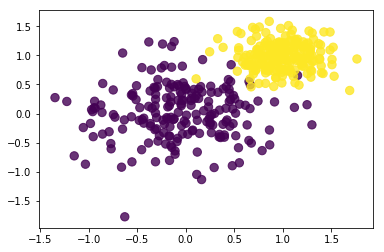

In [3]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

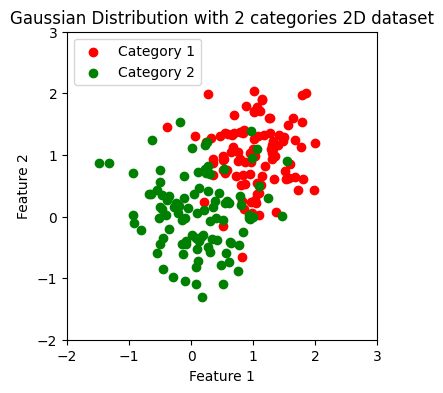

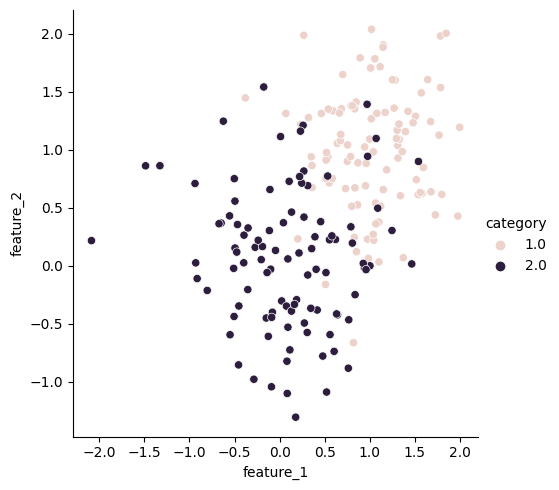

In [4]:
def generate_gaussian_dataset(nsamples1,nsamples2, mean1,sd1, mean2,sd2):
    data1 = pd.DataFrame(np.random.normal(loc=mean1,scale=sd1,size =(nsamples1,2)), columns = ('feature_1','feature_2'))
    data2 = pd.DataFrame(np.random.normal(loc=mean2,scale=sd2,size =(nsamples2,2)), columns = ('feature_1','feature_2'))
    data1['category'] = pd.Series(np.ones(nsamples1))
    data2['category'] = pd.Series(2*np.ones(nsamples2))
    data = pd.concat([data1,data2])
    return data

(nsamples1,nsamples2,mean1,mean2,sd1,sd2) =(100,100,1,0.1,0.5,0.6)
data = generate_gaussian_dataset(nsamples1,nsamples2,mean1,sd1,mean2,sd2)
data

#with pyplot
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(x = data[data['category']==1].loc[:,'feature_1'], y = data[data['category']==1].loc[:,'feature_2'], c='r',label='Category 1')
ax.scatter(x = data[data['category']==2].loc[:,'feature_1'], y = data[data['category']==2].loc[:,'feature_2'], c='g',label='Category 2')
ax.set_title('Gaussian Distribution with 2 categories 2D dataset')
ax.set_xlabel('Feature 1')
ax.set_xlim(left= -2, right =3)
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
ax.set_ylim(bottom = -2, top = 3)

#using seaborn
sns.relplot(x='feature_1',y='feature_2', hue='category', data=data)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

26 25


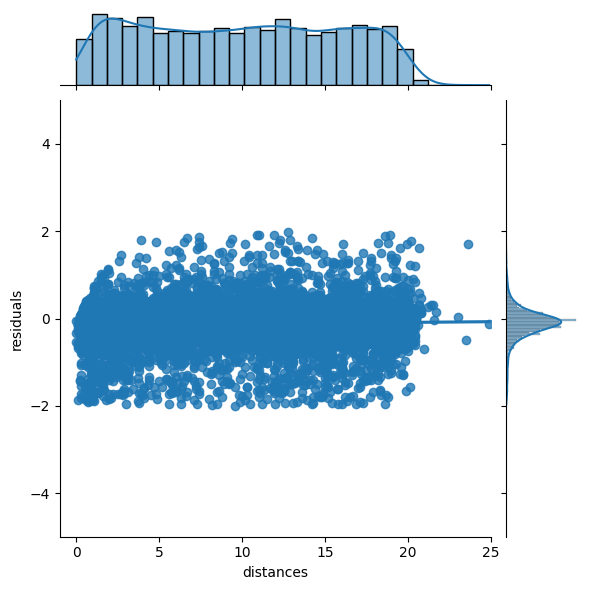

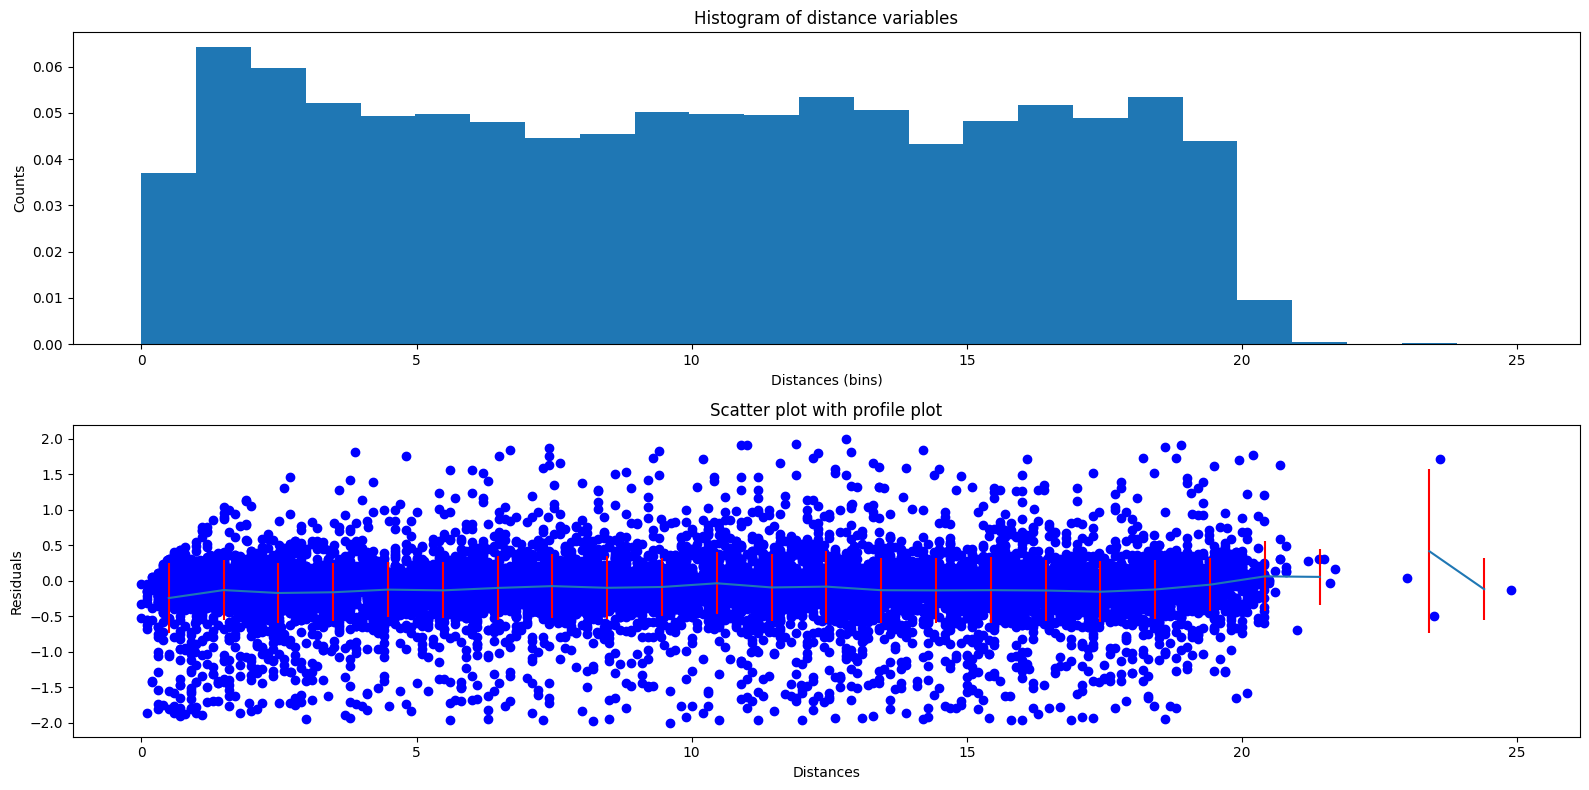

In [5]:
import pickle as pkl
import seaborn as sns
import math

#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

#open and process of the data 
fname = 'data/residuals_261.pkl'
infile = open(fname,'rb')
new_dict = np.array(pkl.load(infile)) #it's a narray
new_dict = dict(enumerate(new_dict.flatten(),1)) 
infile.close()

df = pd.DataFrame(new_dict)
col1 = pd.Series(df.loc['distances',1])
col2 = pd.Series(df.loc['residuals',1])
df = pd.DataFrame({'distances': col1, 'residuals' : col2})
#df

#Cleaning of the samples
df = df[abs(df['residuals']) < 2] #è > o < di 2
#df

#Plot with Seaborn
sns.jointplot(x='distances', y ='residuals',data=df, xlim = (-1,25), ylim =(-5, 5), kind="reg")


#Histogram of distances
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (16,8))
h, bins, _ = ax1.hist(df.loc[:,'distances'],bins = 25, density = True, cumulative = False) #histogramma normalizzato
ax1.set_title('Histogram of distance variables')
ax1.set_xlabel('Distances (bins)')
ax1.set_ylabel('Counts')
fig.tight_layout()

#the array of bin centers of the profile histogram of the "distance" variable
x = np.array(bins + (bins[1]-bins[0])/2)
#the mean values of the "residuals", estimated in slices (bins) of "distance"
y = []
y_err = []
for ib in range(24):
    v = df[df['distances'] > bins[ib]]
    v2 = v[v['distances']< bins[ib + 1]]
    y.append(v2.loc[:,'residuals'].mean())
    y_err.append(v2.loc[:,'residuals'].std())
    
v = df[df['distances'] > bins[25]]
v2 = df[df['distances'] < bins[25] + (bins[1] - bins[0])]
y.append(v2.loc[:,'residuals'].mean())
y_err.append(v2.loc[:,'residuals'].std())
y = np.array(y) 
y_err = np.array(y_err)

print(len(x), len(y))

#Plot the profile plot on top of the scatter plot 
ax2.scatter(x= df['distances'], y=df['residuals'], color = 'b')
ax2.set_title('Scatter plot with profile plot')
ax2.set_xlabel('Distances')
ax2.set_ylabel('Residuals')
ax2.errorbar(x=x[:-1] , y=y , yerr = y_err, ecolor =  'r')
fig.tight_layout()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


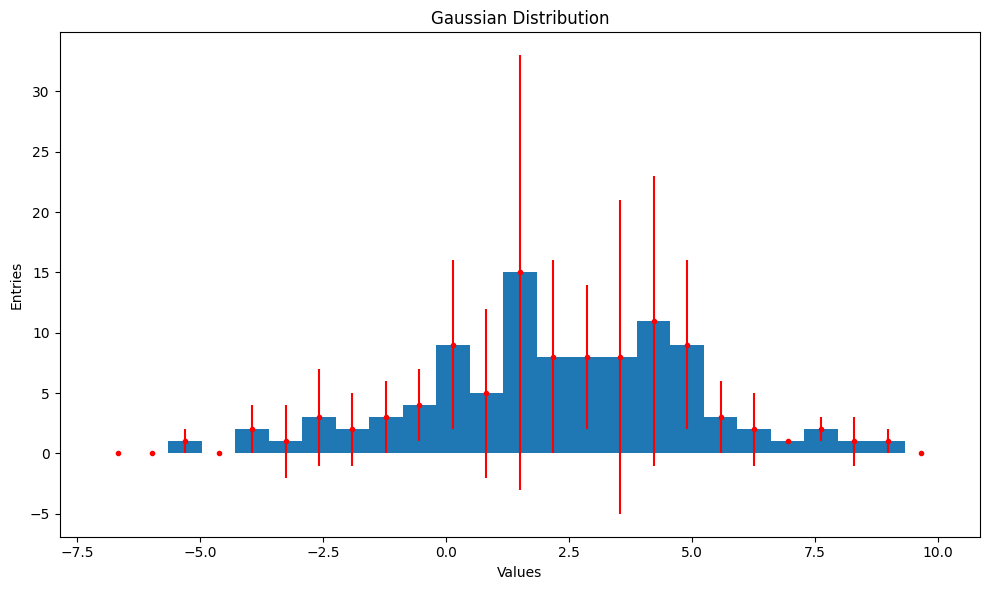

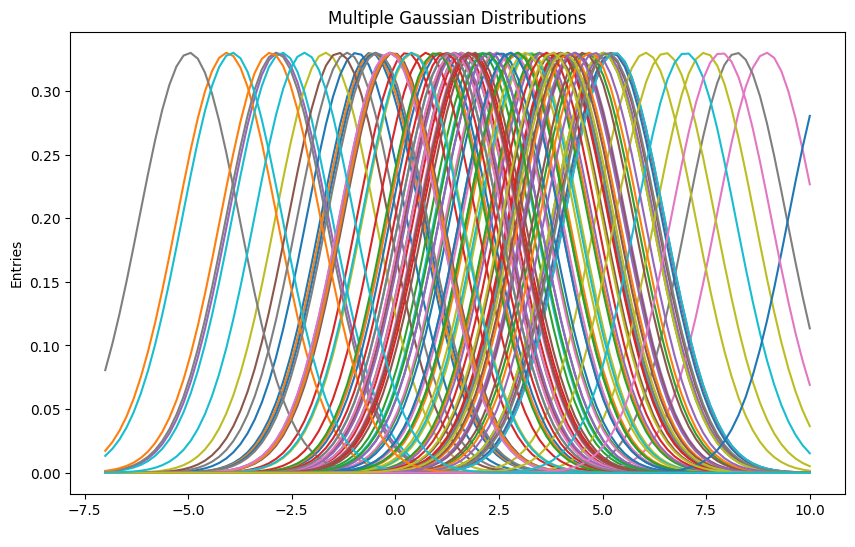

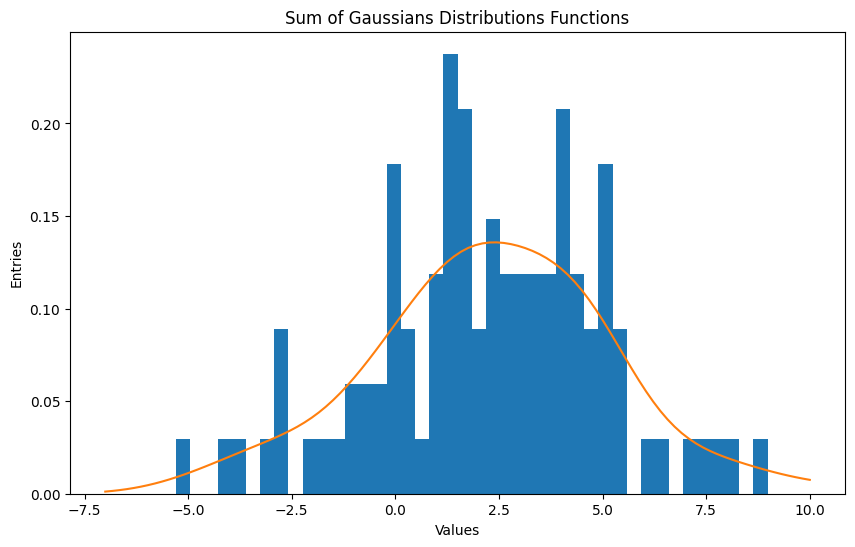

In [6]:
#I am creating the numpy array filled with variables normally distributed, with a given mean and standard deviation

sd=3
mean = 2
N = 100
x = np.random.normal(loc = mean,scale = sd, size = N)

#Plotting the Histogram

fig = plt.figure(figsize=(10, 6)) 
entries, edges, _ = plt.hist(x, bins=25, range=(-7,10)) #i'm using a number of bins = 25
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,25), fmt='r.') #I also plot, beside the normal hist, the rappresentation with points and poisson uncertaintly
ax = fig.axes[0]
ax.set_title('Gaussian Distribution')
#setting the proper y label
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()

#Compute the standard deviation
cum=np.zeros(N)
a=[]
fig = plt.figure(figsize=(10, 6)) 
std=1.06*scipy.stats.tstd(x)*(N)**(-0.2)

#I'm plotting all the gaussian functions
for sd in x:
    t =np.linspace(-7, 10, 100)
    a.append(scipy.stats.norm.pdf(t,sd,std))
    plt.plot(t,a[-1])
    
ax = fig.axes[0]
ax.set_title('Multiple Gaussian Distributions')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()

#Let's sum all the gaussian functions and normalize the results
for sd in a:
    for el in range(100):
        cum[el]= cum[el] + sd[el]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=50, range=(-7,10), density=True, cumulative=False)
plt.plot(t,cum/100) 
ax = fig.axes[0]
ax.set_title('Sum of Gaussians Distributions Functions')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()
